# K- Means Clustering of Iris dataset

#### Nanduru Sai Saketh

This notebook will have data analysis and clustering of dataset containing features of 3 species of flowers

Download the dataset from [here](https://bit.ly/3kXTdox)

Importing Essential Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Load the iris dataset
df = pd.read_csv('iris.csv')
x = df.iloc[:, [0, 1, 2, 3]].values
# See the last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [57]:
df.drop(df.columns[[0]], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Renaming Columns and Number of flowers from each distribution(Frequency)

In [59]:
df.rename(columns = {'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth',
                              'PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace = True)
df_o = pd.crosstab(index=df["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

df_o


col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Identifying correlation among the features(For removal of Redundant features). Based on correlation coefficients, none are redundant.

In [60]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


Identifying outliers via boxplot in Petal Length

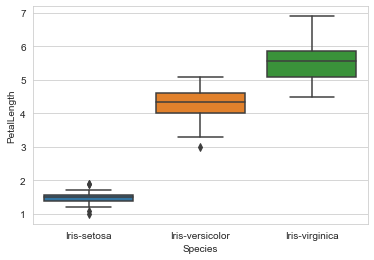

In [61]:
sns.boxplot(x="Species",y="PetalLength",data=df)
plt.show()

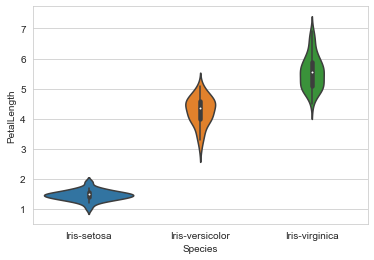

In [62]:
sns.violinplot(x="Species",y="PetalLength",data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


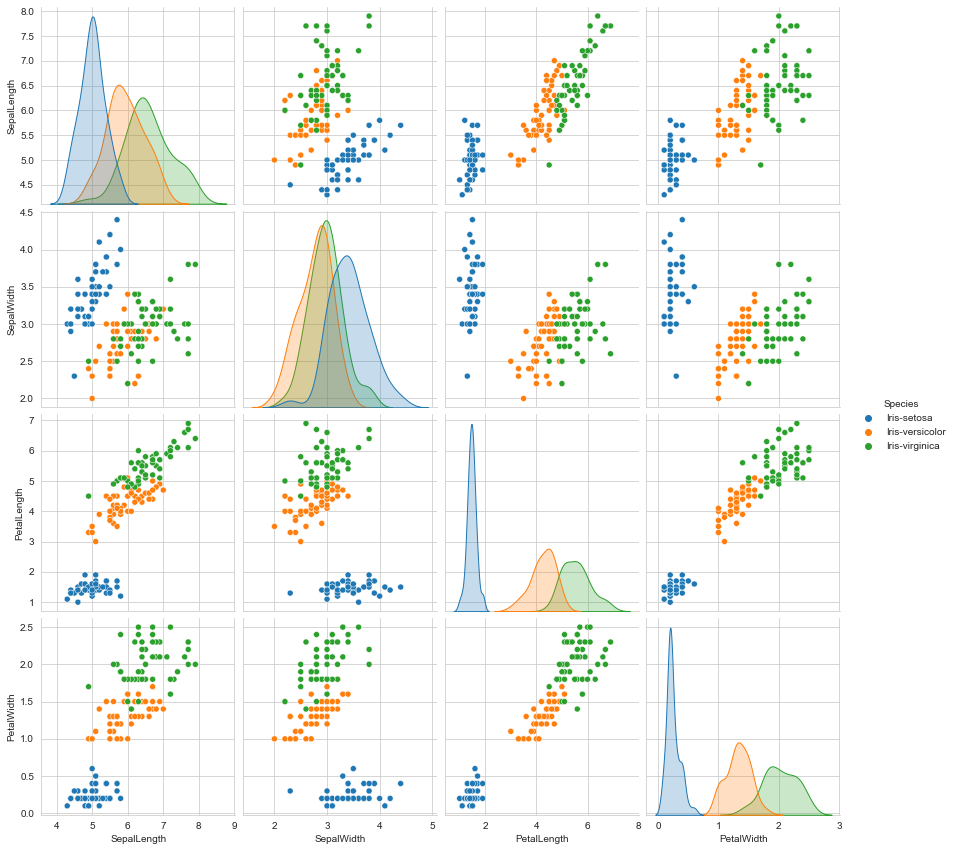

In [63]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",size=3);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


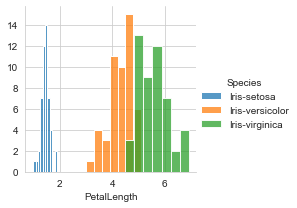

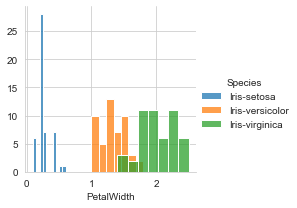

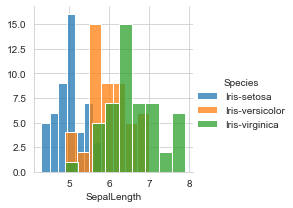

In [70]:
sns.FacetGrid(df,hue="Species",size=3).map(sns.histplot,"PetalLength").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.histplot,"PetalWidth").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.histplot,"SepalLength").add_legend()
plt.show()

# Implementing K-Means Clustering 

### Finding the optimum number of clusters for k-means classification

In [72]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
css = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### ELBOW METHOD
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.
We now plot cluster sum of squares vs k to determine optimal **k** value. From graph, it is evident that there is an **"elbow'** at k = 3, denoting our optimal solution

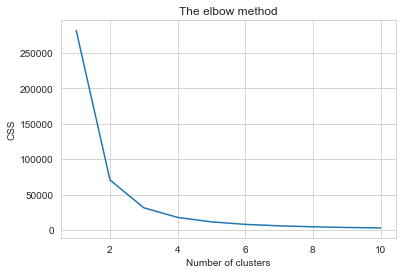

In [81]:
plt.plot(range(1, 11), css)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') #within cluster sum of squares
plt.show()
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

We now visualize the output of clustering algorithm by plotting clusters on first two columns data.

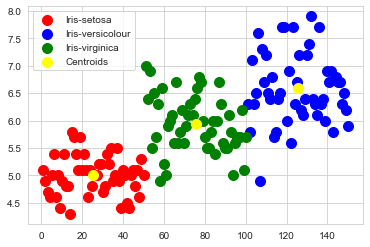

In [83]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

clusters based on first three columns

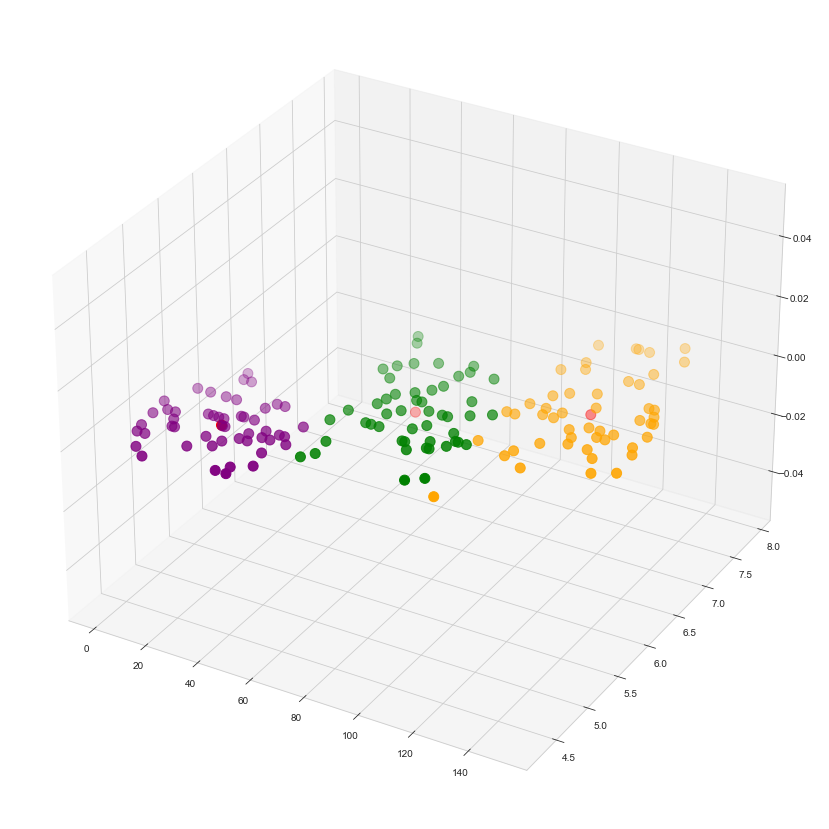

In [84]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

Hence, by the utilization of k-means algorithm and elbow method, we can group data into clusters for the given set of features. This has a big range of applications from document clustering to market segmentation.